In [93]:
from permutations import *
import pandas as pd
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
congress = pd.read_csv('congress_main.csv')
congress['TransactionDate'] = pd.to_datetime(congress['TransactionDate'])
returns = pd.read_csv('returns.csv')
returns.index = returns.Date.astype('datetime64[ns]')
returns.drop('Date', axis=1, inplace=True)
congress.head()

,ReportDate,TransactionDate,Ticker,Representative,Transaction,Amount,Party,House,Range,Sentiment,Price,Low_End,High_End,Adjusted_Low_End,Adjusted_High_End,Running_Portfolio_Low_End,Running_Portfolio_High_End,Est_Portfolio_Value,Shares_High_End,Shares_Low_End
0,2018-05-15,2018-03-05,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,49.059349,1001.0,15000.0,-1001.0,-15000.0,-3003.0,-45000.0,-24001.5,-305.752120,-20.403858
1,2018-06-13,2018-06-01,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,46.939678,1001.0,15000.0,-1001.0,-15000.0,-4004.0,-60000.0,-32002.0,-319.559072,-21.325242
2,2018-09-14,2018-09-06,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,50.084381,1001.0,15000.0,-1001.0,-15000.0,-5005.0,-75000.0,-40002.5,-299.494566,-19.986271
3,2019-03-06,2019-03-05,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,43.876400,1001.0,15000.0,-1001.0,-15000.0,-7007.0,-105000.0,-56003.5,-341.869433,-22.814087
4,2019-06-14,2019-06-03,VMC,A. Mitchell Jr. McConnell,Sale,250001.0,R,Senate,250001 - 500000,NaN,123.395256,250001.0,500000.0,250001.0,500000.0,241993.0,380000.0,310996.5,4052.019634,2026.017921


In [85]:
x=pd.DataFrame()
x['Representative']=ranks['Representative']
x['Ranks']=0
#x[x['Representative']==prank[prank['Variance']>ranks['Variance']]['Representative']]['Ranks']
#x.iloc[list(ranks[ranks['Variance']<prank['Variance']].index),1]+=1
x

,Representative,Ranks
0,Zoe Lofgren,0
1,William R. Timmons Iv,0
2,William R. Keating,0
3,Warren Davidson,0
4,W. Greg Steube,0
...,...,...
209,Alan S. Lowenthal,0
210,Adam Kinzinger,0
211,Adam B. Schiff,0
212,Abigail Spanberger,0


In [44]:
congress['Variance']=congress.apply(calculate_variance,axis=1)
ranks=congress.groupby('Representative')['Variance'].mean().sort_index(ascending=False)
ranks=pd.DataFrame(ranks).reset_index()
ranks

,Representative,Variance
0,Zoe Lofgren,7269.274212
1,William R. Timmons Iv,2598.716501
2,William R. Keating,35699.632310
3,Warren Davidson,249.248936
4,W. Greg Steube,132.526907
...,...,...
209,Alan S. Lowenthal,8974.248334
210,Adam Kinzinger,53.389219
211,Adam B. Schiff,2208.014949
212,Abigail Spanberger,4973.865121


In [87]:
for i in range(1000):
    perm=permutation(congress.iloc[:,:-1])
    perm['Variance']=perm.apply(calculate_variance,axis=1)
    prank=pd.DataFrame(perm.groupby('Representative')['Variance'].mean().sort_index(ascending=False)).reset_index()
    x.iloc[list(ranks[ranks['Variance']<prank['Variance']].index),1]+=1

In [90]:
x=x.rename(columns={'Ranks':'Times Beat Var Rank'})
x

,Representative,Times Beat Var Rank
0,Zoe Lofgren,240
1,William R. Timmons Iv,601
2,William R. Keating,22
3,Warren Davidson,992
4,W. Greg Steube,970
...,...,...
209,Alan S. Lowenthal,132
210,Adam Kinzinger,1000
211,Adam B. Schiff,333
212,Abigail Spanberger,155


In [91]:
x.to_csv('permutations.csv')

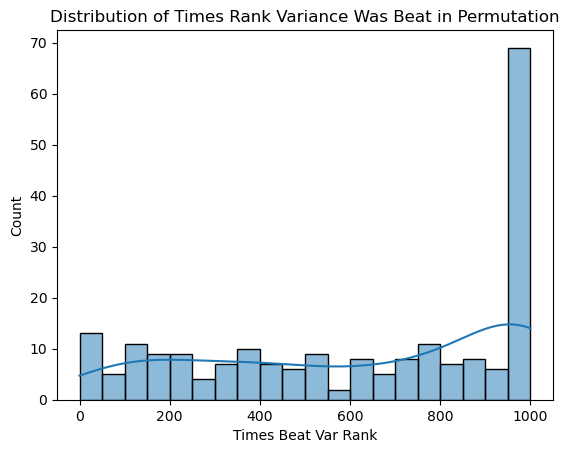

In [103]:
sns.histplot(x['Times Beat Var Rank'],binwidth=50,kde=True)
plt.title('Distribution of Times Rank Variance Was Beat in Permutation')
plt.show()

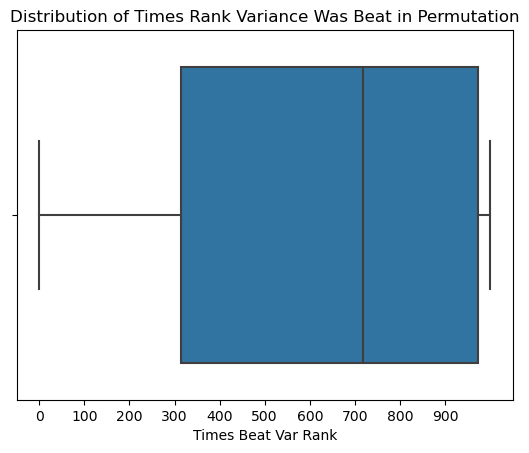

In [110]:
sns.boxplot(data=x,x='Times Beat Var Rank')
plt.xticks(range(0,1000,100))
plt.title('Distribution of Times Rank Variance Was Beat in Permutation')
plt.show()

In [122]:
len(x[x['Times Beat Var Rank']<=43])/len(x)

0.04672897196261682

In [124]:
x[x['Times Beat Var Rank']<=43].sort_values(by='Times Beat Var Rank',ascending=True)

,Representative,Times Beat Var Rank
68,Nicholas Van Taylor,0
120,John Hickenlooper,13
182,Dan Newhouse,17
2,William R. Keating,22
112,Josh Gottheimer,25
181,Dan Sullivan,25
21,Thomas H. Kean,29
184,Cindy Axne,33
73,Mr. Peter Meijer,35
114,Jonathan Jackson,40
